# **Demo notes**

## Simulate data

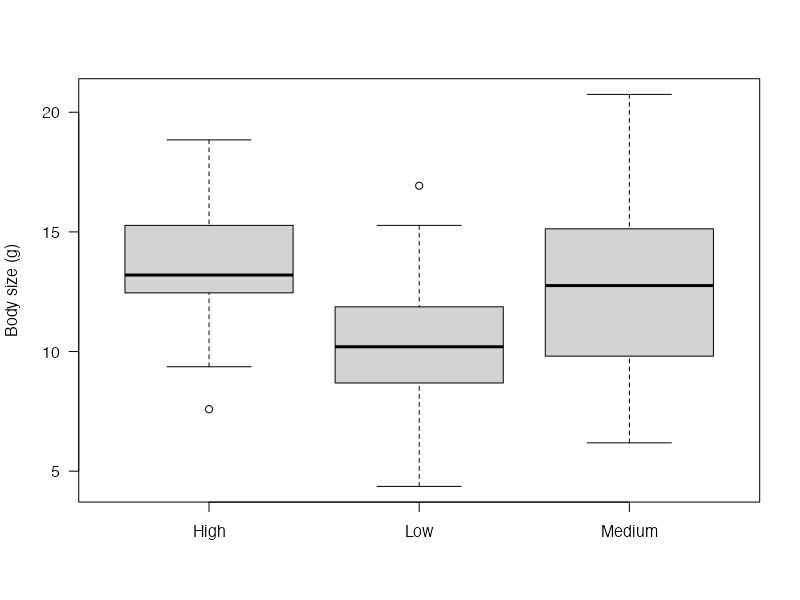

In [1]:
set.seed(100)
groups <- as.factor(rep(c("Low", "Medium", "High"), each=50))
x <- c(rnorm(50, 10, 3), rnorm(50, 13, 3), rnorm(50, 14, 3))
plot(groups, x, las=1, xlab="", ylab="Body size (g)")

## Fit linear model, perform ANOVA

In [2]:
m = lm(x ~ groups)
anova(m)

Analysis of Variance Table

Response: x
           Df  Sum Sq Mean Sq F value    Pr(>F)    
groups      2  319.97 159.985  19.591 2.866e-08 ***
Residuals 147 1200.43   8.166                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

We can derive variance intuitively using

$$ Var=\frac{SS_T}{n-1} $$

where $SS_T$ is the total sum of squares (the sum of values for `groups` and `Residuals` in the `Sum Sq` column of the ANOVA analysis)

In our case

$$ Var = \frac{319.97+1200.43}{150-1} = 10.20

In [3]:
SS_T <- 319.97 + 1200.43
var_anova <- SS_T / (length(x) - 1)

cat("Variance using var(): ", var(x), "\n", sep="")
cat("Variance using ANOVA sum of squares: ", var_anova, sep="")

Variance using var(): 10.20403
Variance using ANOVA sum of squares: 10.20403

The proportion of the variance in the data explained by the `groups` variable is equal to $r^2$.

In [4]:
var_groups <- 319.97 / SS_T * 100
cat("r squared: ", round(var_groups, 2), "%", sep="")

r squared: 21.05%

Calling `summary(m)` returns, among other things, the estimated means for the levels of the `groups` factor. The first factor `High` gets labeled `Intercept`, and its mean value is returned. The rest of the factor levels have their mean minus the intercept mean reported. Hypothesis tests test the null hypothesis that a factor level mean is equal to the reference group mean.

In [5]:
summary(m)


Call:
lm(formula = x ~ groups)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5887 -1.5596 -0.0987  1.6274  7.9729 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   13.7006     0.4041  33.901  < 2e-16 ***
groupsLow     -3.4561     0.5715  -6.047 1.16e-08 ***
groupsMedium  -0.9277     0.5715  -1.623    0.107    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.858 on 147 degrees of freedom
Multiple R-squared:  0.2105,	Adjusted R-squared:  0.1997 
F-statistic: 19.59 on 2 and 147 DF,  p-value: 2.866e-08


### Surpressing the intercept

This is useful if you want the mean for each group and to get the confidence intervals

In [6]:
m_surp <- lm(x~groups-1)
print(summary(m_surp)$coef)
print(confint(m_surp))

             Estimate Std. Error  t value     Pr(>|t|)
groupsHigh   13.70064  0.4041333 33.90129 2.276884e-71
groupsLow    10.24453  0.4041333 25.34937 1.586298e-55
groupsMedium 12.77295  0.4041333 31.60578 1.980446e-67
                 2.5 %   97.5 %
groupsHigh   12.901979 14.49930
groupsLow     9.445865 11.04319
groupsMedium 11.974287 13.57161


Notice that the confidence intervals make less sense if we get call `confint(m)`, since the means are expressed relative to the mean of the reference group.

In [7]:
print(confint(m))

                 2.5 %     97.5 %
(Intercept)  12.901979 14.4993020
groupsLow    -4.585592 -2.3266351
groupsMedium -2.057170  0.2017866


# **Exercise notes**

In [41]:
# Import library
library("tidyverse")
# Import data
df <- read.csv("Materials/butterflies.csv")
# Convert to tibble
data <- as_tibble(df)
print(names(data))

[1] "LarvalID"        "LarvalHost"      "Sex"             "MaternalHost"    "MotherID"        "DevelopmentTime"
[7] "AdultWeight"     "GrowthRate"     


In [9]:
df$MaternalHost <- paste0(df$MaternalHost, "M")
df$LarvalHost <- paste0(df$LarvalHost, "L")
means <- tapply(df$DevelopmentTime, list(df$MaternalHost, df$LarvalHost), mean)
means

          BarbareaL BerteroaL
BarbareaM  21.69608  27.00000
BerteroaM  23.51282  31.01923

In [42]:
# Select relevant data
data <- data %>%
  select(LarvalHost, MaternalHost, AdultWeight, GrowthRate)

# print(data)

data_summary <- data %>%
  group_by(LarvalHost, MaternalHost) %>%  # You need the group_by here for it to summarize by groups
  summarize(
    AdultWeightMean = mean(AdultWeight), AdultWeightSD = sd(AdultWeight),
    GrowthRateMean = mean(GrowthRate), GrowthRateSD = sd(GrowthRate)
  )
print(data_summary)

`summarise()` has grouped output by 'LarvalHost'. You can override using the `.groups` argument.
# A tibble: 4 × 6
# Groups:   LarvalHost [2]
  LarvalHost MaternalHost AdultWeightMean AdultWeightSD GrowthRateMean GrowthRateSD
  <chr>      <chr>                  <dbl>         <dbl>          <dbl>        <dbl>
1 Barbarea   Barbarea                65.4          9.47         0.0837      0.00532
2 Barbarea   Berteroa                66.7         10.4          0.0779      0.00726
3 Berteroa   Barbarea                53.5          9.03         0.0642      0.00626
4 Berteroa   Berteroa                50.4          8.45         0.0549      0.00444


In [11]:
# Model
m_aw <- lm(data$AdultWeight ~ data$LarvalHost * data$MaternalHost)
m_gr <- lm(data$GrowthRate ~ data$LarvalHost * data$MaternalHost)
anova_aw <- anova(m_aw)
anova_gr <- anova(m_gr)
print(anova_aw)
print(anova_gr)

Analysis of Variance Table

Response: data$AdultWeight
                                   Df  Sum Sq Mean Sq  F value Pr(>F)    
data$LarvalHost                     1 13086.0 13086.0 145.6248 <2e-16 ***
data$MaternalHost                   1     7.5     7.5   0.0833 0.7731    
data$LarvalHost:data$MaternalHost   1   336.7   336.7   3.7471 0.0539 .  
Residuals                         283 25430.7    89.9                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table

Response: data$GrowthRate
                                   Df    Sum Sq   Mean Sq  F value Pr(>F)    
data$LarvalHost                     1 0.0310561 0.0310561 875.4154 <2e-16 ***
data$MaternalHost                   1 0.0035847 0.0035847 101.0475 <2e-16 ***
data$LarvalHost:data$MaternalHost   1 0.0002080 0.0002080   5.8621 0.0161 *  
Residuals                         283 0.0100397 0.0000355                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

In [26]:
summary(m_aw)


Call:
lm(formula = data$AdultWeight ~ data$LarvalHost * data$MaternalHost)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.324  -6.214  -0.024   6.084  28.123 

Coefficients:
                                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                                        65.3549     0.9386  69.629  < 2e-16 ***
data$LarvalHostBerteroa                           -11.8513     1.5858  -7.473 9.81e-13 ***
data$MaternalHostBerteroa                           1.3695     1.4259   0.960   0.3377    
data$LarvalHostBerteroa:data$MaternalHostBerteroa  -4.4962     2.3227  -1.936   0.0539 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.48 on 283 degrees of freedom
Multiple R-squared:  0.3456,	Adjusted R-squared:  0.3387 
F-statistic: 49.82 on 3 and 283 DF,  p-value: < 2.2e-16


In [ ]:
summary(m_gr)


Call:
lm(formula = data$GrowthRate ~ data$LarvalHost * data$MaternalHost)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0191549 -0.0034058  0.0004718  0.0041452  0.0126051 

Coefficients:
                                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                                        0.0837158  0.0005897 141.952  < 2e-16 ***
data$LarvalHostBerteroa                           -0.0194909  0.0009964 -19.561  < 2e-16 ***
data$MaternalHostBerteroa                         -0.0057776  0.0008959  -6.449 4.85e-10 ***
data$LarvalHostBerteroa:data$MaternalHostBerteroa -0.0035335  0.0014594  -2.421   0.0161 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005956 on 283 degrees of freedom
Multiple R-squared:  0.7763,	Adjusted R-squared:  0.774 
F-statistic: 327.4 on 3 and 283 DF,  p-value: < 2.2e-16


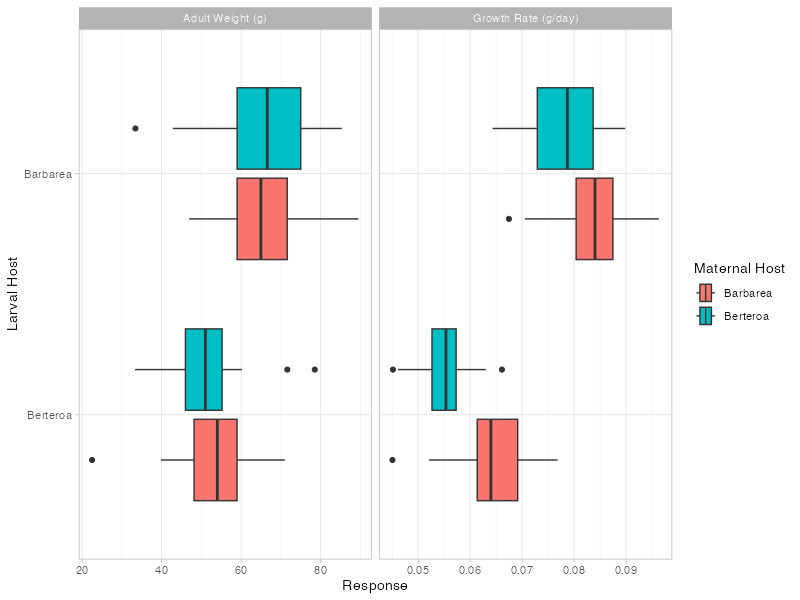

In [58]:
data_p <- data %>%
  pivot_longer(
    cols=AdultWeight:GrowthRate, names_to="Response", values_to="Value"
  )

response.labs <- c("Adult Weight (g)", "Growth Rate (g/day)")
names(response.labs) <- c("AdultWeight", "GrowthRate")

data_p %>%
  ggplot(aes(
    y = factor(LarvalHost, level = c("Berteroa", "Barbarea")),
    x = Value,
    fill = MaternalHost
  )) +
  geom_boxplot() +
  labs(x = "Response", y = "Larval Host", fill = "Maternal Host") +
  facet_grid(
    cols = vars(Response),
    labeller = labeller(Response = response.labs),
    scales = "free"
  ) +
  theme_light()

# A tibble: 234 × 11
   manufacturer model      displ  year   cyl trans      drv     cty   hwy fl    class  
   <chr>        <chr>      <dbl> <int> <int> <chr>      <chr> <int> <int> <chr> <chr>  
 1 audi         a4           1.8  1999     4 auto(l5)   f        18    29 p     compact
 2 audi         a4           1.8  1999     4 manual(m5) f        21    29 p     compact
 3 audi         a4           2    2008     4 manual(m6) f        20    31 p     compact
 4 audi         a4           2    2008     4 auto(av)   f        21    30 p     compact
 5 audi         a4           2.8  1999     6 auto(l5)   f        16    26 p     compact
 6 audi         a4           2.8  1999     6 manual(m5) f        18    26 p     compact
 7 audi         a4           3.1  2008     6 auto(av)   f        18    27 p     compact
 8 audi         a4 quattro   1.8  1999     4 manual(m5) 4        18    26 p     compact
 9 audi         a4 quattro   1.8  1999     4 auto(l5)   4        16    25 p     compact
10 audi    

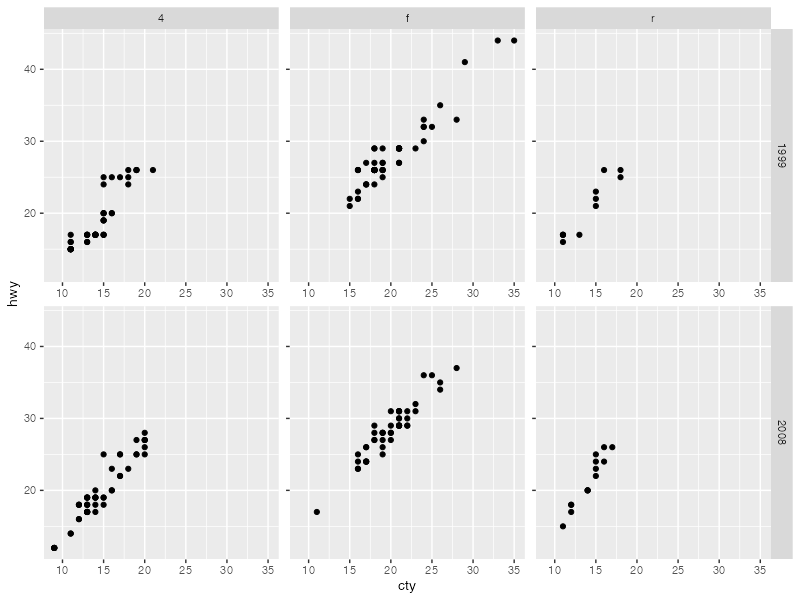

In [13]:
ggplot(mpg, aes(cty, hwy)) +
  geom_point() +
  facet_grid(year ~ drv, axes = "all", axis.labels = "all_x")
print(mpg)